# Final assignment: Data Analysis

# Thông tin cá nhân
- Tên: Cao Xuân Duật
- Email: duatbkad@gmail.com
- Lớp: Python `201217`
- Deadline: 2021-05-23 (before 23:59:59)

## 1. Hướng dẫn chung
- Các bạn đọc câu hỏi và trả lời bằng cách tạo cell mới (nếu cần) để viết code vào theo hướng dẫn ở mỗi bài
- Code phải chạy được và ra đúng kết quả với phần test (expected result)
- Có thể sử dụng lại kết quả đã làm ở câu hỏi trước (vd: hàm đã tạo ở câu hỏi trước đó)
- Có thể import các module cần thiết nếu cần
- Điểm sẽ được chấm với trọng số như sau:
    - Tính chính xác (80%): code đúng về cả mặt logic lẫn cú pháp, đúng với mục đích của bài toán
    - Giải thuật tốt (10%): cách tiếp cận/giải thuật tốt
    - Coding style (10%): code sáng sủa và follow guiding princincples của Python (vd: sử dụng thêm khoảng trắng 2 bên phép toán, naming theo snake case, comment đoạn code phức tạp, cách import ...)

## 2. Assigments

Trước khi làm bài tập, chạy cell dưới đây để import các gói cần thiết

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import ticker
style.use('seaborn-white')

Data gồm 3 files Excel

1. `data/deaths_per_100k.xlsx`: tổng số người chết vì bệnh lao (trên 100k dân số) ứng với từng năm cho từng country
1. `data/incidence_per_100k.xlsx`: ước tính tổng số cases mới mắc bệnh lao (trên 100k dân số) ứng với từng năm cho từng country
1. `data/prevalence_per_100k.xlsx`: ước tính tổng số case hiện tại mắc bệnh lao (trên 100k dân số) ứng với từng năm cho từng country

### Question 1

#### 1.1. Load data từ 3 file Excel vào 3 data frames (DFs):

- `deaths`: load từ `data/deaths_per_100k.xlsx`
- `incidence`: load từ `data/incidence_per_100k.xlsx`
- `prevalence`: load từ `data/prevalence_per_100k.xlsx`
    

In [302]:
# Load data

deaths = pd.read_excel("data/deaths_per_100k.xlsx")
incidence = pd.read_excel("data/incidence_per_100k.xlsx")
prevalance = pd.read_excel("data/prevalence_per_100k.xlsx")

#### 1.2. Đổi tên cột đầu tiên của mỗi DF trên thành `country`

In [303]:
# Rename cols

deaths.rename(columns = { deaths.columns[0]: "country" }, inplace = True)
incidence.rename(columns = { incidence.columns[0]: "country" }, inplace = True)
prevalance.rename(columns = { prevalance.columns[0]: "country" }, inplace = True)


#### 1.3. Show 3 dòng đầu tiên cho mỗi DF trên theo đúng thứ tự. 

Từ giờ trở đi, nếu không nói gì thêm, khi câu hỏi yêu cầu tính giá trị gì đó cho cả 3 DFs thì thứ tự sẽ là `deaths`, `incidence`, và `prevalance`

<hr>

**Expected results:**

<img src="img/preview_3_DFs.png" width="600px">

In [304]:
# Show first 3 rows
deaths.head(3) 

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,50,49,48,47,47,46,46,45,43,43,41,39,36,37,34,33,31,30
1,Albania,4,4,4,4,4,5,5,5,5,5,4,4,4,4,4,4,3,3
2,Algeria,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [305]:
incidence.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168,168,168.0
1,Albania,25.0,24.0,25.0,26.0,26.0,27.0,27.0,28.0,28.0,27.0,25.0,23.0,23.0,22.0,21.0,20,18,17.0
2,Algeria,38.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,47.0,48.0,49.0,50.0,51.0,53.0,54,55,57.0


In [306]:
prevalance.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56


### Question 2

#### 2.1. In ra số dòng, cột cho mỗi DF 

Expected: `(207, 19) (208, 19) (207, 19)`

In [307]:
# Số dòng và cột cho mỗi DF
deaths.shape , incidence.shape , prevalance.shape

((207, 19), (208, 19), (207, 19))

#### 2.2. Kiểm tra số lượng unique countries trong mỗi DF

Có DF nào bị lặp countries không? Nếu có thì là DF nào và countries nào?

In [308]:
# Kiểm tra unique countries
pd.Series(deaths["country"]).is_unique

True

In [176]:
#DF deaths không bị lặp country, số country :
deaths["country"].nunique()

207

In [309]:
pd.Series(incidence["country"]).is_unique

True

In [310]:
# DF incidence không bị lặp country, số country là
incidence["country"].nunique()

208

In [311]:
pd.Series(prevalance["country"]).is_unique

True

In [312]:
# DF prevalance không bị lặp country, số country là :
prevalance["country"].nunique()

207

#### 2.3. Kiểm tra xem cả 3 DFs có chung số các countries không

Nếu sai khác thì sai khác ở những countries nào?

In [313]:
deaths["country"].value_counts()

New Zealand             1
Costa Rica              1
Netherlands Antilles    1
Croatia                 1
Iran                    1
                       ..
Lesotho                 1
Iraq                    1
Colombia                1
Kenya                   1
Australia               1
Name: country, Length: 207, dtype: int64

In [314]:
incidence["country"].value_counts()

New Zealand             1
Bermuda                 1
Cameroon                1
Netherlands Antilles    1
Croatia                 1
                       ..
Armenia                 1
Lesotho                 1
Iraq                    1
Colombia                1
Australia               1
Name: country, Length: 208, dtype: int64

In [315]:
prevalance["country"].value_counts()

New Zealand             1
Costa Rica              1
Netherlands Antilles    1
Croatia                 1
Iran                    1
                       ..
Lesotho                 1
Iraq                    1
Colombia                1
Kenya                   1
Australia               1
Name: country, Length: 207, dtype: int64

In [ ]:
# Kiểm tra sai khác trong cột country


In [316]:
# 1 deaths vs. incidence
df_12 = pd.concat([deaths, incidence])
df_12 = df_12.reset_index(drop=True)
df_12_gpby = df_12.groupby(list(df_12.country))
idx = [x[0] for x in df_12_gpby.groups.values() if len(x) == 1]
df_12.reindex(idx)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
326,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,32,NaN


In [317]:
# 2 deaths vs. prevalance
df_13 = pd.concat([deaths, prevalance])
df_13 = df_13.reset_index(drop=True)
df_13_gpby = df_13.groupby(list(df_13.country))
idx = [x[0] for x in df_13_gpby.groups.values() if len(x) == 1]
df_13.reindex(idx)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007


In [318]:
# 3 incidence vs. prevalance
df_23 = pd.concat([incidence, prevalance])
df_23 = df_23.reset_index(drop=True)
df_23_gpby = df_23.groupby(list(df_23.country))
idx = [x[0] for x in df_23_gpby.groups.values() if len(x) == 1]
df_23.reindex(idx)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
119,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,32,NaN


### Question 3

#### 3.1. Đổi 3 DFs trên từ dạng wide sang long

Ghi đè luôn lên tên biến cũ, không tạo DFs mới, kết quả gồm 3 cột như sau cho mỗi DF:

- `deaths`: `country`, `year`, `deaths`
- `incidence`: `country`, `year`, `incidence`
- `prevalance`: `country`, `year`, `prevalance`

In [319]:
# Reshape data deaths
deaths = deaths.melt(
        id_vars = ["country"],
        var_name = "year",
        value_name = "deaths"
        )
        

In [320]:
# Reshape data incidence
incidence = incidence.melt(
        id_vars = ["country"],
        var_name = "year",
        value_name = "incidence"
        )
            

In [321]:
# Reshape data prevalance
prevalance = prevalance.melt(
        id_vars = ["country"],
        var_name = "year",
        value_name = "prevalance"
        )
            

#### 3.2. In ra 3 dòng đầu tiên cho mỗi DF

**Expected:**

<img src="img/preview_3_DFs_long.PNG" width="200px">

In [ ]:
# Preview first 3 rows 


In [322]:
deaths.head(3)

,country,year,deaths
0,Afghanistan,1990,50
1,Albania,1990,4
2,Algeria,1990,2


In [323]:
incidence.head(3)

,country,year,incidence
0,Afghanistan,1990,168.0
1,Albania,1990,25.0
2,Algeria,1990,38.0


In [324]:
prevalance.head(3)

,country,year,prevalance
0,Afghanistan,1990,436
1,Albania,1990,42
2,Algeria,1990,45


#### 3.3. In ra shape của 3 DFs mới 

Expected: `(3726, 3) (3744, 3) (3726, 3)`

In [325]:
# Check shape
deaths.shape, incidence.shape , prevalance.shape

((3726, 3), (3744, 3), (3726, 3))

### Question 4

#### 4.1. Tính tổng số deaths cho từng country overtime

Show ra top 5 nước có total deaths cao nhất


Expected:

<img src="img/top_5_total_deaths.png" width="150px">

In [70]:
# Tổng số deaths từng country overtime

In [333]:
# Top 5 total deaths

top_5_death = deaths.groupby("country")["deaths"].sum().nlargest(5).reset_index()


In [334]:
top_5_death

,country,deaths
0,Swaziland,3999
1,Zimbabwe,3791
2,Zambia,3445
3,South Africa,2873
4,Djibouti,2217


#### 4.2. Plot deaths overtime cho top 5 countries ở 4.1

Expected:

<img src="img/top_5_total_deaths_plot.png" width="500px">

In [335]:
# Prepare data
top_5_detail = deaths[deaths["country"].isin(top_5_death["country"])]
top_5_detail.reset_index(inplace = True, drop = True)

In [336]:
top_5_detail

,country,year,deaths
0,Djibouti,1990,126
1,South Africa,1990,78
2,Swaziland,1990,79
3,Zambia,1990,126
4,Zimbabwe,1990,140
...,...,...,...
85,Djibouti,2007,157
86,South Africa,2007,230
87,Swaziland,2007,317
88,Zambia,2007,115


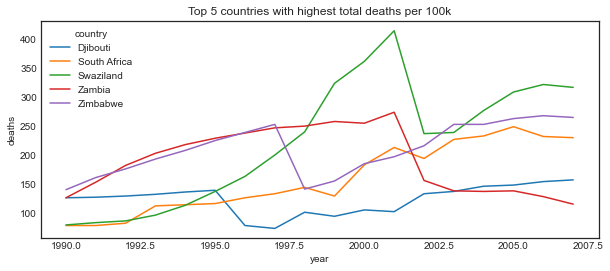

In [337]:
# Plot
fix, ax = plt.subplots(figsize = (10, 4))

sns.lineplot(
    x = "year",
    y = "deaths",
    hue = "country",
    data = top_5_detail,
    ax = ax
)

# title of plot
ax.set_title("Top 5 countries with highest total deaths per 100k")

# labels cho các trục tọa độ
#x_label = range(1990, 2008, 1)
#ax.set_xticklabels(x_label)
ax.set_xlabel("year")
ax.set_ylabel("deaths")

plt.show()

#### 4.3. Lập bảng thống kê mô tả cho deaths của top 5 countries trên

Thống kê số lượng, mean, standard deviation, min, q1, median, q2, max của cột `deaths` over time (18 years).

Expected:

<img src="img/top_5_total_deaths_summary.png" width="500px">

In [338]:
# Summary stats of top 5 countries deaths
top_5_detail.groupby("country").describe()

deaths                                                        \
              count        mean         std    min     25%    50%     75%   
country                                                                     
Djibouti       18.0  123.166667   25.144874   73.0  102.75  130.5  138.50   
South Africa   18.0  159.611111   60.051095   78.0  114.50  138.5  223.50   
Swaziland      18.0  222.166667  107.079547   79.0  119.00  238.0  315.00   
Zambia         18.0  191.388889   55.236538  115.0  138.00  192.5  244.75   
Zimbabwe       18.0  210.611111   44.172308  140.0  178.25  212.0  253.00   

                     
                max  
country              
Djibouti      157.0  
South Africa  249.0  
Swaziland     415.0  
Zambia        274.0  
Zimbabwe      268.0

#### 4.4. Vẽ boxplots cho top 5 countries trên

Expected:

<img src="img/top_5_total_deaths_boxplot.png" width="300px">

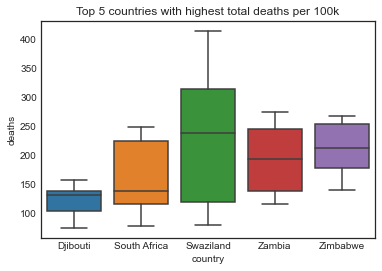

In [339]:
# Plot

fix, ax = plt.subplots(figsize = (6, 4))
sns.boxplot( x = "country", y = "deaths", data = top_5_detail )\
            .set(title = "Top 5 countries with highest total deaths per 100k")
plt.show()

### Question 5

#### 5.1. Lọc prevalence data từ năm 1997 đến 2007 cho tất cả countries lưu vào biến `prevalence_97_07`

1. Nhớ reset index với option `drop=True`
2. Data frame này có bao nhiêu rows? (Expected: 2277)

In [340]:
# viết điều kiện để lọc cột year

years = range(1997, 2008)

prevalance_97_07 = prevalance.loc[prevalance["year"].isin(years)].reset_index(drop = True)


In [341]:
# data prevalance của tất cả country từ 1997 - 2007
prevalance_97_07

,country,year,prevalance
0,Afghanistan,1997,387
1,Albania,1997,44
2,Algeria,1997,44
3,American Samoa,1997,25
4,Andorra,1997,23
...,...,...,...
2272,Wallis et Futuna,2007,25
2273,West Bank and Gaza,2007,31
2274,Yemen,2007,130
2275,Zambia,2007,387


In [342]:
# số rows của newdata
prevalance_97_07.shape[0]

2277

#### 5.2. Dùng `prevalence_97_07`, group by country và tính average prevalence

Sắp xếp country theo thứ tự average prevalence từ cao xuống thấp

<img src="img/prevalence_97_07_avg.png" width="200px">

In [343]:
# Compute avg prevalence for each country

avg_prevalance_97_07 = prevalance_97_07.groupby("country")["prevalance"].mean().reset_index()

In [344]:
# sắp xếp thứ tự từ cao xuống thấp theo giá trị prevalance của các country

avg_prevalance_97_07.sort_values("prevalance", ascending = False ).reset_index(drop = True)

,country,prevalance
0,Djibouti,888.454545
1,Sierra Leone,749.090909
2,Cambodia,726.000000
3,Swaziland,717.090909
4,Togo,686.545455
...,...,...
202,Barbados,4.272727
203,Sweden,4.090909
204,United States of America,3.818182
205,Iceland,2.727273


#### 5.3. Plot bar chart cho top 20 countries có avg prevalence cao nhất

Expected:

<img src="img/top_20_avg_prevalence.png" width="500px">

In [345]:
# Prepare data
# lọc 20 countries có avg prevalance cao nhất
top_20_prevalance = avg_prevalance_97_07.nlargest(20,"prevalance").reset_index(drop = True)

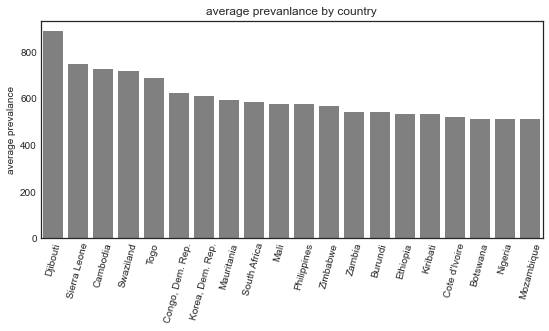

In [347]:
### Plot
fig, ax = plt.subplots(figsize = (9, 4))
# plot
sns.barplot(
    x = "country",
    y = "prevalance",
    data = top_20_prevalance,
    ax = ax,
    color = "grey"
)
# naming plot and label
ax.set_title("average prevanlance by country")
ax.set_ylabel("average prevalance")
ax.set_xticklabels(top_20_prevalance["country"].tolist(), rotation = 75)
ax.set_xlabel(None)

plt.show()